# 第4章  一元线性回归

## 4.6 计量经济学中的python应用
使用statsmodels进行计量回归的基本步骤：

1. 导入所需的库
2. 读取数据->grilic.dta
3. 动机与模型
4. 定义变量
5. 模型拟合
6. 检验

### 1.导入所需的库

In [9]:
import pandas as pd
import statsmodels.api as sm

### 2.读取数据

In [10]:
grilic = pd.read_stata('../2_Data/Data-2e/grilic.dta')
grilic.head()

,rns,mrt,smsa,med,iq,kww,age,s,expr,tenure,lnw
0,0,0,1,8,93,35,19,12,0.462,0,5.900
1,0,0,1,14,119,41,23,16,0.000,2,5.438
2,0,0,1,14,108,46,20,14,0.423,1,5.710
3,0,0,1,12,96,32,18,12,0.333,1,5.481
4,0,1,1,6,74,27,26,9,9.013,3,5.927


### 4.定义变量

In [11]:
y = grilic['lnw']
X = grilic[['s']]
X_const = sm.add_constant(X) # 增加常数项


### 5.模型拟合

In [12]:
# 含常数项的一元线性回归模型
model_const = sm.OLS(y,X_const)
grilic_ols_const = model_const.fit()
print(grilic_ols_const.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     255.7
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           8.52e-50
Time:                        13:28:59   Log-Likelihood:                -323.05
No. Observations:                 758   AIC:                             650.1
Df Residuals:                     756   BIC:                             659.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3915      0.082     53.481      0.0

In [13]:
# 不含常数项的一元线性回归模型
model = sm.OLS(y,X)
grilic_ols = model.fit()
print(grilic_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    lnw   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.673e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:28:59   Log-Likelihood:                         -916.23
No. Observations:                 758   AIC:                                      1834.
Df Residuals:                     757   BIC:                                      1839.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 6.检验

statsmodel官方文档中提到了一种 Rainbow test的检验方法，用于检验线性模型的显著性，是对模型本身的建议。
- 原假设：使用全部样本拟合的模型和使用样本的中心子集拟合的模型是一样的
- 备择假设：是不一样的。

彩虹检验对许多不同形式的非线性具有检测能力。


In [14]:
# rb = sm.stats.linear_rainbow(grilic)
rb_const = sm.stats.linear_rainbow(grilic_ols_const)
rb_const

(1.03845218165309, 0.35701882417527536)

### 附录

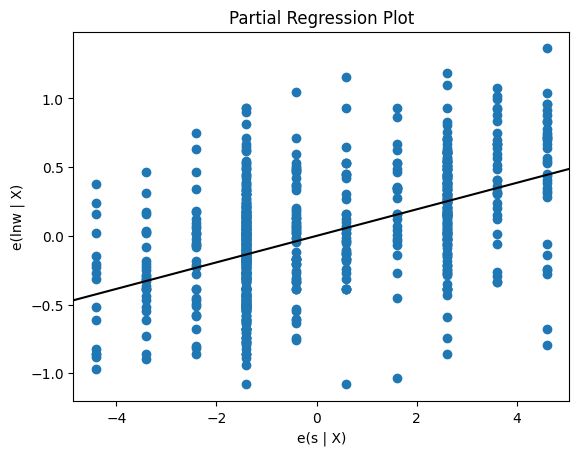

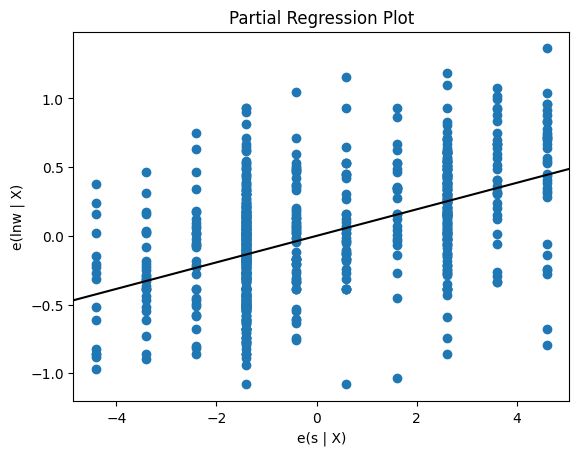

In [15]:
# 绘图可以更直观的看到样本回归线

# 使用statsmodels 的 plot_partregress 函数绘制样本回归线
sm.graphics.plot_partregress(endog='lnw', 
                             exog_i='s',
                             exog_others=[ ],
                             data=grilic, 
                             obs_labels=False # 不显示样本点的标签
                             )

<Axes: xlabel='s', ylabel='lnw'>

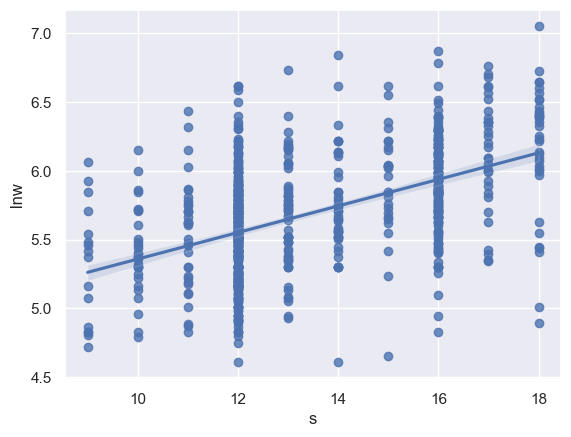

In [16]:
# 使用seaborn绘制散点图
import seaborn as sns
sns.set_theme(color_codes=True)
sns.regplot(x=grilic['s'], y = grilic['lnw'])


## 4.9 总体回归函数和样本回归函数：蒙特卡洛模拟

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     56.39
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.09e-10
Time:                        14:07:04   Log-Likelihood:                -206.23
No. Observations:                  60   AIC:                             416.5
Df Residuals:                      58   BIC:                             420.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1829      1.324      0.894      0.3

<Axes: >

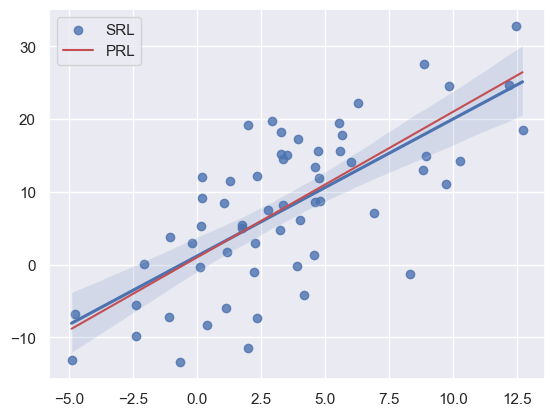

In [26]:
# import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# 设置随机种子以获得可重现的结果（可选）
np.random.seed(62223)
# 生成60个x和e的样本
x = np.random.normal(3, 4, 60)
e = np.random.normal(0, 9, 60)
y =1 + 2*x + e

# 设置常数项
X_const = sm.add_constant(x)
model = sm.OLS(y, X_const)
results = model.fit()
print(results.summary())

sns.set_theme(color_codes=True)
sns.regplot(x = x, y = y, color = 'b', label='SRL')
sns.lineplot(x = x, y = 1 + 2*x, color = 'r',label='PRL')


## 习题4.7 代码实现

child_stats: 平均值为68.0884780883789,  标准差为2.5179409980773926,  最小值为61.70000076293945,  最大值为73.69999694824219
parent_stats: 平均值为68.30818939208984,  标准差为1.787333369255066,  最小值为64.0,  最大值为73.0
OLS统计回归结果:
                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.73e-49
Time:                        01:43:10   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

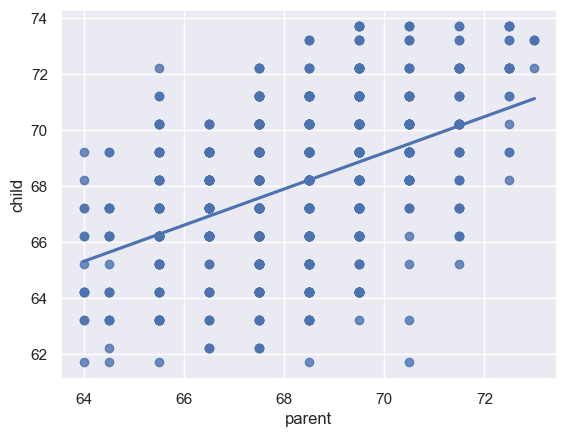

In [22]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# 读取数据
galton =  pd.read_stata('../2_Data/Data-2e/galton.dta')
galton.head(30)

# (1)计算child列和parent列的基本统计特征
child_stats	= [galton['child'].mean(), 
               galton['child'].std(), 
               galton['child'].min(), 
               galton['child'].max()]
parent_stats	= [galton['parent'].mean(), 
                galton['parent'].std(), 
                galton['parent'].min(), 
                galton['parent'].max()]

print('child_stats: 平均值为{},  标准差为{},  最小值为{},  最大值为{}'.format(*child_stats))
print('parent_stats: 平均值为{},  标准差为{},  最小值为{},  最大值为{}'.format(*parent_stats))

# 可能理解错了，应该是统计回归的特征吧
# 模型:child = \alpha + \beta * parent + \epsilon

# 定义变量
x = galton['parent']
y = galton['child']
x = sm.add_constant(x)

print('OLS统计回归结果:')
res = sm.OLS(y, x).fit().summary()
print(res)
# 绘制散点图与线性拟合图画在一起
sns.set_theme(color_codes=True)
origin = sns.regplot(x=galton['parent'], y=galton['child'], ci=None) 




                            OLS Regression Results                            
Dep. Variable:                 gengap   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     73.94
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.41e-17
Time:                        01:44:23   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2197      0.073     -2.990      0.0

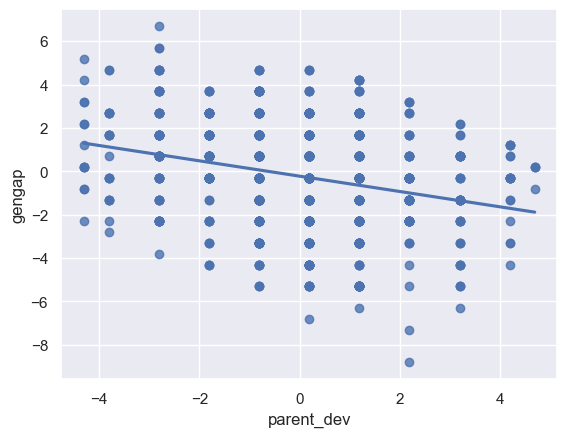

In [26]:
# (5)定义父母身高与父母平均身高差为parent_dev变量，定义子女身高与父母身高差为gengap变量，将gengap对parent_dev进行回归分析，并绘制回归曲线。
galton_dev = pd.DataFrame()
galton_dev['gengap'] = galton['child'] - galton['parent']
galton_dev['parent_dev'] = galton['parent'] - galton['parent'].mean()

y_dev = galton_dev['gengap']
x_dev = galton_dev['parent_dev']
x_dev = sm.add_constant(x_dev)

res = sm.OLS(y_dev, x_dev).fit().summary()
print(res)

sns.set_theme(color_codes=True)
dev = sns.regplot(x=galton_dev['parent_dev'], y=galton_dev['gengap'], ci=None)
print(dev) 